# Basic imports...

In [1]:
import sys
import data_loaders
import features
import parameters
import training
import pandas as pd
from ice import HamiltonOnIce 
import collections

from hamilton import driver
from typing import List, Dict, Any
from hamilton import base

# Magic for developing -- allows reloading

If you like developing externall like I do, this is critical. If not, we have tooling to write functions in a notebook (and would love feedback on developing more).

In [2]:
# Some magic for developing...
# Functions can also be inside the notebook if you want
import importlib
# load extension
%load_ext autoreload
# configure autoreload to only affect specified files
%autoreload 1
# import & specify modules to be reloaded
# i.e. this is the data transformation module that I have open in other tab
%aimport training
%aimport features

# Hamilton on Ice

(Added the class to a normal sourced file)

Note: Hamilton collects completely anonymous data about usage. This will help us improve Hamilton over time. See https://github.com/dagworks-inc/hamilton#usage-analytics--data-privacy for details.


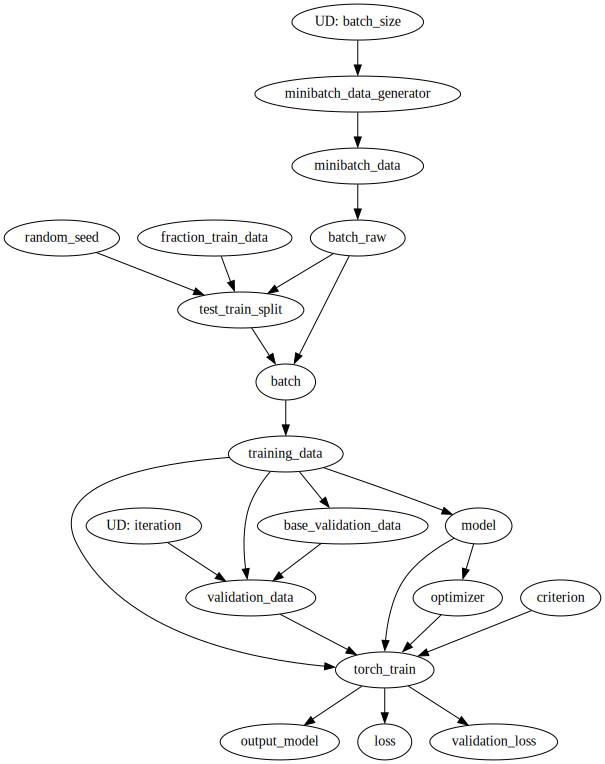

In [3]:
dr = driver.Driver(
    {"fine_grained_lineage": False, "batch_size" : 32},
#     {"fine_grained_lineage": True, "batch_size" : 32}, # enable if you want to use fine-grained lineage (features as their own functions)
    data_loaders,
    parameters,
    training,
    features,
    adapter=base.SimplePythonGraphAdapter(base.DictResult())
)
# Visualize execution, for fun
dr.visualize_execution(
    ['validation_loss', 'loss', 'output_model'],
    None, #change to "outfile" or something if you want it to pop up, and not just show here
    {},
    inputs={"iteration" : 0}
)

In [4]:
# Instantiate a basic "HamiltonOnIce" driver
ice = HamiltonOnIce(
    driver=dr, # Pass in the driver
    remember=["loss", "validation_loss", "batch_number"], # Remember the loss
    outputs=["output_model", "batch_number"],
    inputs={} # paths, everything, is hardcoded
)

# Actual iterations

Note that only use one loop (as opposed to two nested loops).
This is something where we'd like to clean up the ergonomics.

In [5]:
# Run through each epoch
# Not doing mini-batches -- that's up next!
last_epoch = 0
result = {"batch_number" : 0}
while (epoch:=result["batch_number"]) <= 200:
    if (epoch % 10) == 0 and last_epoch != epoch:
        print(f"epoch: {epoch}")
    result = next(ice)
    last_epoch = epoch
epochs = pd.DataFrame.from_records(ice.memory)

epoch: 10
epoch: 20
epoch: 30
epoch: 40
epoch: 50
epoch: 60
epoch: 70
epoch: 80
epoch: 90
epoch: 100
epoch: 110
epoch: 120
epoch: 130
epoch: 140
epoch: 150
epoch: 160
epoch: 170
epoch: 180
epoch: 190
epoch: 200


In [8]:
# JJD: saving all this to memory will (eventually) be problematic.
ice.memory

defaultdict(list,
            {'loss': [0.68320232629776,
              0.680866539478302,
              0.6769595742225647,
              0.6842712759971619,
              0.678341805934906,
              0.679614782333374,
              0.6797006726264954,
              0.6795850396156311,
              0.6878271698951721,
              0.6859005093574524,
              0.6734692454338074,
              0.6799757480621338,
              0.6869086027145386,
              0.6877192258834839,
              0.6746436357498169,
              0.6861365437507629,
              0.6864380836486816,
              0.6819201707839966,
              0.6824550032615662,
              0.6806136965751648,
              0.6809259653091431,
              0.683146595954895,
              0.6737412214279175,
              0.6875022649765015,
              0.6799575686454773,
              0.68178391456604,
              0.6779795289039612,
              0.6799741387367249,
              0.67877602577209

In [ ]:
epochs.groupby("batch_number").mean().plot();